## Estadistica Aplicada 

Sesion 9B-10 - 12-13 septiembre 

Ana Sofia Saucedo Garcia
Grupo 42

In [29]:
# #Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [30]:
#Libreria especializada

from lifelines import CoxPHFitter
import seaborn as sns

In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
# datos 

df_cancer = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/cancer.csv')

In [33]:
df_cancer.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


Los datos constan de 228 observaciones y 10 variables/columnas. La descripción de las variables es la siguiente:
inst: código de institución\
**time (d1)**: tiempo de supervivencia en días\
**status (d2)**: estado de censura 1 = censurado, 2 = muerto\
**age (i1)**: Edad en años\
**sex (i2)**: Masculino = 1 Femenino = 2\
**ph.ecog (i3)**: puntuación de rendimiento ECOG según la calificación del médico. 0 = asintomático, 1 = sintomático pero completamente ambulatorio, 2 = en cama <50% del día, 3 = en cama > 50% del día pero no encamado, 4 = encamado\
**ph.karno (i4)**: puntuación de desempeño de Karnofsky (mala = 0; buena = 100) calificada por el médico\
**pat.karno (i4)**: puntuación de rendimiento de Karnofsky según la calificación del paciente\
**meal.cal (i5)**: Calorías consumidas en las comidas\
**wt.loss (i6)**: Pérdida de peso en los últimos seis meses

tiene menú contextual

In [34]:
# Depurar y estadisticas descriptivas 
# recodificar variables dummy 

df_cancer['status']=df_cancer['status']-1

df_cancer['sex']= df_cancer['sex']-1

# status : 0 = censurado , 1 = muerto 
# sex 0= hombre , 1= mujer


In [35]:
# Borrar la variable ins 
df_cancer=df_cancer.drop('inst',axis=1)

In [36]:
# verificar que las variables son numericas

df_cancer.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

Todas las variables son numericas

In [37]:
# contar los valores perdidos / faltantes (missing)
df_cancer.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

Cuando hay valores perdidos hay dos opciones :
1. Eliminar las observaciones con valores perdidos 
2. Imputar datos (promedio)



In [38]:
# Asignar a los valores perdidos el valor promedio de la variable

df_cancer['ph.karno']=df_cancer['ph.karno'].fillna(df_cancer['ph.karno'].mean())
df_cancer['pat.karno']=df_cancer['pat.karno'].fillna(df_cancer['pat.karno'].mean())
df_cancer['meal.cal']=df_cancer['meal.cal'].fillna(df_cancer['meal.cal'].mean())
df_cancer['wt.loss']=df_cancer['wt.loss'].fillna(df_cancer['wt.loss'].mean())

df_cancer= df_cancer.dropna()
df_cancer['ph.ecog']=df_cancer['ph.ecog'].astype('int64')


In [39]:
# Estadistcas descriptivas 
df_cancer.describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,306.264317,0.722467,62.458150,0.396476,0.951542,82.034971,79.999413,927.474067,9.734118
std,210.532764,0.448771,9.092045,0.490246,0.717872,12.240894,14.543193,358.375611,12.670492
min,5.000000,0.000000,39.000000,0.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,168.500000,0.000000,56.000000,0.000000,0.000000,80.000000,70.000000,768.000000,0.000000
50%,259.000000,1.000000,63.000000,0.000000,1.000000,80.000000,80.000000,928.779006,8.000000
75%,399.000000,1.000000,69.000000,1.000000,1.000000,90.000000,90.000000,1075.000000,15.000000
max,1022.000000,1.000000,82.000000,1.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


In [40]:
df_cancer['sex'].value_counts()

sex
0    137
1     90
Name: count, dtype: int64

In [41]:
90/228
# El promedio de 0 y 1 en la variable sex , representa la proporcion de cada genero 

0.39473684210526316

De la tabla descriptiva de nuestros datos observamos que el 39.47% son mujeres , el 72.36% de las personas fallecieron , la edad promedio es de 62 años , el mas joven es una persona de 39 años y la persona mas vieja es de 82 . La media de ph.karno es mayor que la media de pat.karno que significa que los pacientes consideran su estado de salud mucho peor de lo que realmente es

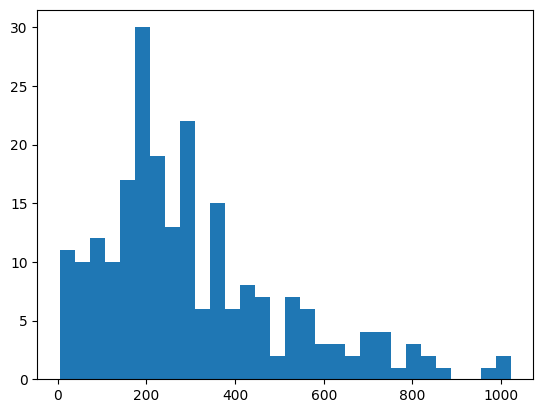

In [42]:
plt.hist(df_cancer['time'],bins=30);

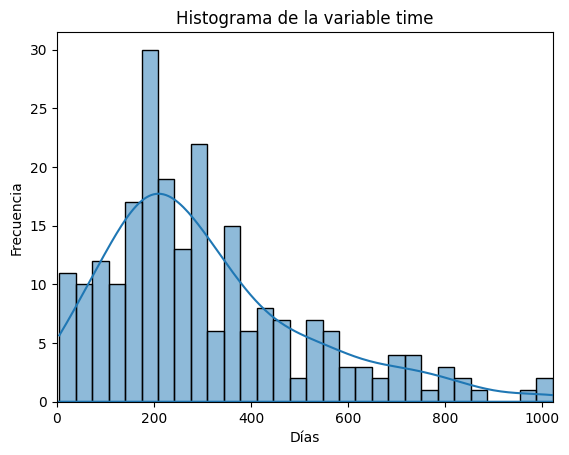

In [43]:
sns.histplot(df_cancer['time'], bins=30, kde=True)

sns.kdeplot(df_cancer['time'])

plt.xlim(0,1022)

plt.xlabel('Días')

plt.ylabel('Frecuencia')

plt.title('Histograma de la variable time');

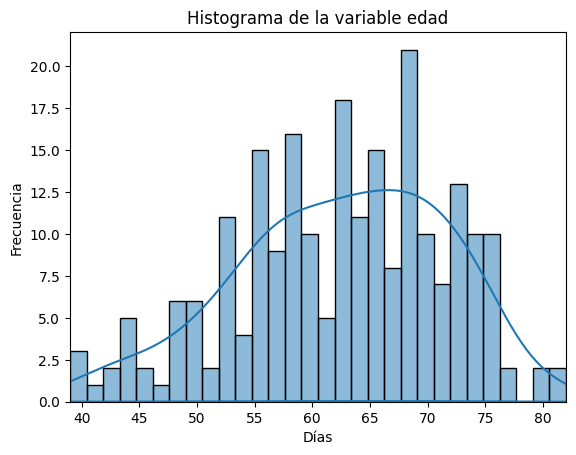

In [44]:
sns.histplot(df_cancer['age'], bins=30, kde=True)

sns.kdeplot(df_cancer['age'])

plt.xlim(39,82)

plt.xlabel('Días')

plt.ylabel('Frecuencia')

plt.title('Histograma de la variable edad');

In [45]:
# estimar el modelo 
cph1 = CoxPHFitter()
cph1.fit(df_cancer,'time','status')


<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>

In [46]:
cph1.print_summary()

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -725.64
         time fit was run = 2023-09-13 21:39:11 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.59       0.56       0.17            -0.92            -0.25                 0.40                 0.78
ph.ecog     0.62       1.85       0.18             0.26             0.98                 1.29                 2.66
ph.karno    0.02       1.02       0.01            -0.00             0.03                 1.00                 1.03
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  1.35   0.18       2.49
sex           0.00 -3.44 <0.005      10.76
ph.ecog       0.00  3.35 <0.005      10.28
ph.karno      0.00  1.66   0.10       3.36
pat.karno     0.00 -1.77   0.08       3.70
meal.cal      0.00  0.10   0.92       0.12
wt.loss       0.00 -1.73   0.08       3.57
---
Concordance = 0.65
Partial AIC = 1465.28
log-likelihood ratio test = 37.68 on 7 df
-log2(p) of ll-ratio test = 18.13

### Conclusiones tabla

La variable age su pvalue es de 0.18 , por lo cual no rechazamos $H_0$ , entonces age no tiene efecto en el riesgo de morir de cancer

La variable sex su pvalue es < $alpha$ , por lo cual rechazamos $H_0$ , entonces sex  tiene efecto en el riesgo de morir de cancer , y nos dice que ser mujer reduce el riesgo de morir de cancer en 44% respecto a los hombres (1-exp(coef)=1-0.56=0.44)

La variable ph.karno su pvalue es de 0.10 , por lo cual no rechazamos $H_0$ , entonces ph.karno no tiene efecto en el riesgo de morir de cancer

La variable ph.karno su pvalue es de 0.08 , por lo cual no rechazamos $H_0$ , entonces pat.karno no tiene efecto en el riesgo de morir de cancer

La variable meal.cal su pvalue es de 0.92 , por lo cual no rechazamos $H_0$ , entonces meal.cal no tiene efecto en el riesgo de morir de cancer

La variable wt.loss su pvalue es de 0.08 , por lo cual no rechazamos $H_0$ , entonces wt.loss no tiene efecto en el riesgo de morir de cancer

La variable ph.ecog su pvalue es < $alpha$ , por lo cual rechazamos $H_0$ , entonces ph.ecog  tiene efecto en el riesgo de morir de cancer , y nos dice con el exp(coef) que aumenta el riesgo de morir de cancer en 85%  (exp(coef)-1 =1.85-1=0.85)



# Cargar una nueva base 

In [47]:
from lifelines.datasets import load_rossi

In [48]:
rossi= load_rossi()

In [50]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [51]:
cph2 = CoxPHFitter().fit(rossi,'week','arrest')
cph2.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-13 22:11:54 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

La variable fin su pvalue es 0.05 , no rechazamos $H_0$ , fin no tiene efecto de volver a la carcel o no

La variable  age su pvalue es 0.01 , rechazamos $H_0$ , la edad reduce el riesgo de volver a ser arrestado , por cada año de edad que se cumple se reduce el riesgo en 6% (1-exp(coef))

La variables race su pvalue es 0.31, No rechazamos $H_0$ ser negro no tiene efecto sobre el riesgo de volver a ser arrestado 

Tambien las variables wexp, mar, paro su pvalue > $alpha$  No rechazamos $H_0$ no tiene efecto sobre el riesgo de volver a ser arrestado 

La variable prio su pvalue es <alpha  , rechazamos $H_0$ , por cada vez que te han arrestado el riesgo de volver a ser arrestado aumenta 10%


